In [1]:
# 오차제곱합 구현

import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [2]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [3]:
# 예2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

In [4]:
# 교차 엔트로피 구현

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [7]:
# MNIST 데이터셋 로드

%cd /content/drive/MyDrive/밑바닥부터 시작하는 딥러닝/ch04/

import sys, os
sys.path.append(os.pardir)
print(sys.path)
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다. 
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 각 데이터의 형상 출력
print(x_train.shape)    # (60000, 784)
print(t_train.shape)    # (60000, 10)

/content/drive/MyDrive/밑바닥부터 시작하는 딥러닝/ch04
['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '..']
(60000, 784)
(60000, 10)


In [8]:
# 미니배치

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [9]:
np.random.choice(60000,10)

array([19731, 33669, 42565, 41547, 20086, 31725, 31551, 24218, 10708,
       15233])

In [10]:
# (배치용) 교차 엔트로피 오차 구현하기 (정답이 원-핫 인코딩일 때)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [11]:
# (배치용) 교차 엔트로피 오차 구현하기 (정답이 원-핫 인코딩이 아닐 때)

def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [12]:
# 나쁜 구현 예

def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

In [13]:
# 반올림 오차

np.float32(1e-50)

0.0

In [14]:
# 개선된 수치 미분 구현

def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

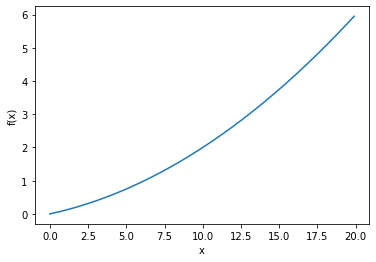

In [16]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0,0.1)    # 0에서 20까지 0.1 간격의 배열 x를 만든다 (20은 미포함)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [17]:
numerical_diff(function_1, 5)

0.1999999999990898

In [18]:
numerical_diff(function_1, 10)

0.2999999999986347

In [19]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
    # 또는 return np.sum(x ** 2)

In [20]:
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [21]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [22]:
def numerical_gradient(f, x):
    h = 1e-4    # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x + h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x - h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val    # 값 복원
    
    return grad

In [23]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [24]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [25]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [26]:
# 경사 하강법 구현

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [27]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [28]:
# 학습률이 너무 큰 예 : lr = 10.0

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [29]:
# 학습률이 너무 작은 예 : lr = 1e-10

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [30]:
# 간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드 구현
%cd /content/drive/MyDrive/밑바닥부터 시작하는 딥러닝/ch04/

import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

/content/drive/MyDrive/밑바닥부터 시작하는 딥러닝/ch04


In [31]:
net = simpleNet()
print(net.W)    # 가중치 매개변수

[[-0.01854242 -0.50238583 -1.11899719]
 [ 0.19644735 -0.15035705 -0.85932177]]


In [32]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.16567717 -0.43675284 -1.44478791]


In [33]:
np.argmax(p)    # 최댓값의 인덱스

0

In [34]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

2.1685212348086043

In [35]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.34339169  0.18799996 -0.53139165]
 [ 0.51508753  0.28199994 -0.79708747]]


In [36]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW

array([[ 0.34339169,  0.18799996, -0.53139165],
       [ 0.51508753,  0.28199994, -0.79708747]])

In [37]:
# 2층 신경망 클래스 구현하기

%cd /content/drive/MyDrive/밑바닥부터 시작하는 딥러닝/ch04/

import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

/content/drive/MyDrive/밑바닥부터 시작하는 딥러닝/ch04


In [38]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape  # (784, 100)
net.params['b1'].shape  # (100,)
net.params['W2'].shape  # (100, 10)
net.params['b2'].shape  # (10, )

(10,)

In [39]:
x = np.random.rand(100, 784)    # 더미 데이터 입력
y = net.predict(x)

In [40]:
x = np.random.rand(100, 784)    # 더미 데이터 입력
t = np.random.rand(100, 10)     # 더미 정답 레이블

grads = net.numerical_gradient(x, t)    # 기울기 계산

grads['W1'].shape   # (784, 100)
grads['b1'].shape   # (100,)
grads['W2'].shape   # (100, 10)
grads['b2'].shape   # (10, )

(10,)

In [41]:
# 미니배치 학습 구현하기

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000   # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100    # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [42]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다. 
train_size = x_train.shape[0]
batch_size = 100    # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1 에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1 에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.79095, 0.7946
train acc, test acc | 0.8775, 0.8818
train acc, test acc | 0.8976, 0.8993
train acc, test acc | 0.9082333333333333, 0.9106
train acc, test acc | 0.9145, 0.9174
train acc, test acc | 0.91935, 0.9208
train acc, test acc | 0.9247333333333333, 0.9269
train acc, test acc | 0.9280166666666667, 0.93
train acc, test acc | 0.9320166666666667, 0.9335
train acc, test acc | 0.9349166666666666, 0.9348
train acc, test acc | 0.93755, 0.9385
train acc, test acc | 0.9407333333333333, 0.9401
train acc, test acc | 0.9423666666666667, 0.9415
train acc, test acc | 0.9437, 0.9425
train acc, test acc | 0.9460166666666666, 0.9444
train acc, test acc | 0.9478333333333333, 0.9457
